<h1>Importing necessary libraries</h1>

In [1]:
import pandas as pd
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import tkinter as tk
from tkinter import font as tkFont
import webbrowser

<h1>Loading data and confirming that it is correct</h1>

In [2]:
tracks_df = pd.read_csv('spotify_tracks.csv')

tracks_df.head()

,UID,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [3]:
tracks_df.describe()

,UID,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,56999.500000,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,32909.109681,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28499.750000,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,56999.500000,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,85499.250000,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


<h1>Selecting the necessary features for clustering</h1>

In [4]:
features = ["acousticness","danceability","energy","instrumentalness","liveness","speechiness","valence"]

<h1>Visualizing distribution and correlation</h1>

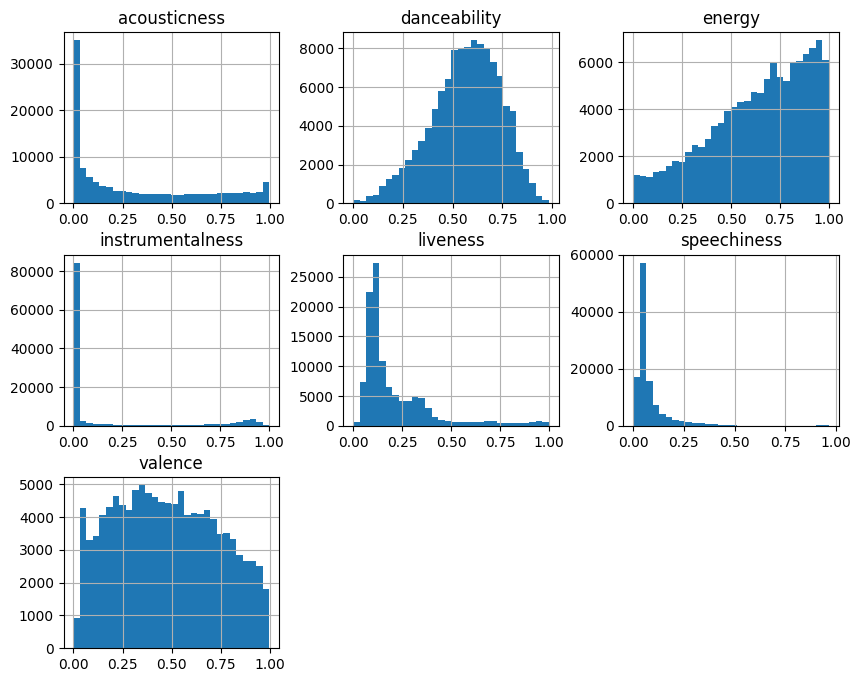

In [5]:
tracks_df[features].hist(bins=30, figsize=(10, 8))
plt.show()

The histograms of the seven features (acousticness, danceability, energy, instrumentalness, liveness, speechiness, and valence) from the Spotify dataset reveal distinct patterns in their distributions. Acousticness, instrumentalness, liveness, and speechiness show highly skewed distributions with a majority of tracks clustered at lower values, indicating that most songs have low levels of these features. Danceability and energy exhibit more balanced distributions, suggesting that songs in the dataset vary widely in terms of these characteristics, with danceability peaking around 0.6 and energy steadily increasing. Valence, which measures the musical positivity conveyed, has a relatively uniform distribution with a slight peak around 0.5. These insights indicate diverse musical attributes across tracks, with certain features like danceability and energy being more varied, while others like instrumentalness and speechiness are more uniform, primarily skewed towards lower values. Understanding these distributions helps in designing and tuning clustering algorithms for effective song recommendation systems.

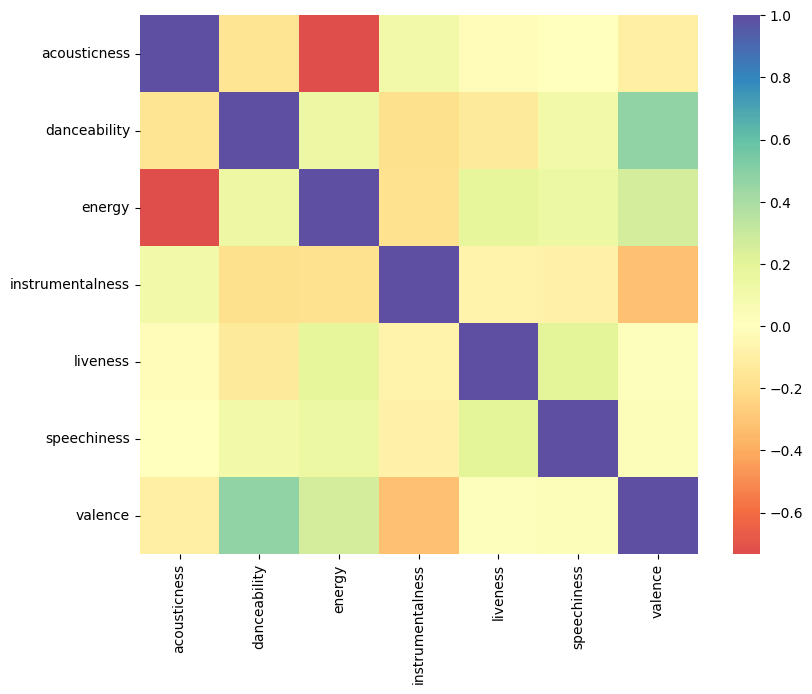

In [6]:
tracks_corr = tracks_df[features].corr()
plt.figure(figsize=(9, 7))
sns.heatmap(tracks_corr, cmap='Spectral', center=0)
plt.show()

The correlation heatmap visualizes the relationships between various musical features in the Spotify dataset. Key observations include a strong negative correlation between acousticness and energy, indicating that tracks with high energy tend to have low acousticness, and vice versa. Danceability shows a moderate positive correlation with valence, suggesting that more danceable tracks are often perceived as more positive or happy. Instrumentalness has a weak correlation with most features but shows a slight negative correlation with danceability and valence, implying that instrumental tracks are less danceable and less positive. Speechiness shows a notable positive correlation with liveness, reflecting that tracks with more speech-like qualities tend to be perceived as more live or spontaneous. Overall, the heatmap reveals significant relationships that can inform the clustering and recommendation process by highlighting how different musical attributes interact.

<h1>Handling outliers with the z-score method</h1>

In [7]:
z_scores = np.abs(stats.zscore(tracks_df[features]))

mask = (z_scores < 3).all(axis=1)
tracks_df = tracks_df[mask]

Using the Z-score method for the Spotify dataset helps clean up the training data by removing extreme values that could mess up the model's accuracy. This makes sure the model focuses on the usual patterns and relationships in the data. By getting rid of outliers, the model avoids overfitting and works better with new, unseen data. As a result, the model becomes more reliable and gives better predictions, since it’s based on data that represents the typical entries in the Spotify dataset.

<h1>Scaling the values using MinMaxScaler</h1>

In [8]:
scaler = MinMaxScaler()
scaled_tracks = scaler.fit_transform(tracks_df[features])

<h1>Implementing and comparing different clustering algorithms</h1>

In [9]:
# KMeans Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_tracks)

tracks_df['KMeans'] = kmeans_labels

<h3>K-Distance graph for DBSCAN</h3>

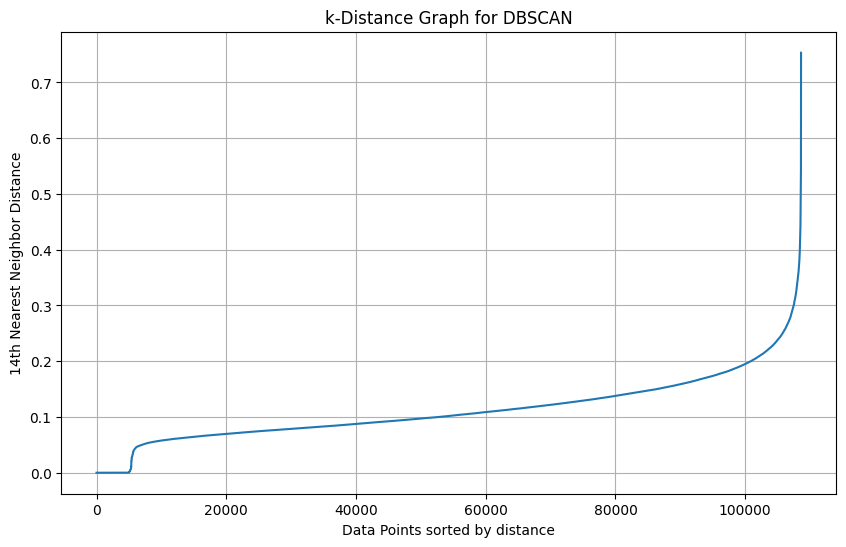

In [10]:
k = 14
nearest_neighbors = NearestNeighbors(n_neighbors=k)
neighbors_fit = nearest_neighbors.fit(scaled_tracks)
distances, indices = neighbors_fit.kneighbors(scaled_tracks)

k_distances = distances[:, k-1]
k_distances = np.sort(k_distances)

plt.figure(figsize=(10, 6))
plt.plot(k_distances)
plt.xlabel('Data Points sorted by distance')
plt.ylabel(f'{k}th Nearest Neighbor Distance')
plt.title('k-Distance Graph for DBSCAN')
plt.grid(True)
plt.show()

In [11]:
# DBSCAN Clustering
dbscan = DBSCAN(eps=0.2, min_samples=14)
dbscan_labels = dbscan.fit_predict(scaled_tracks)

tracks_df['DBSCAN'] = dbscan_labels

In [12]:
# Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=4)
agglo_labels = agglo.fit_predict(scaled_tracks)

tracks_df['Agglomerative'] = agglo_labels

<h3>Elbow Method for KMeans and Silhouette Analyses for each model</h3>

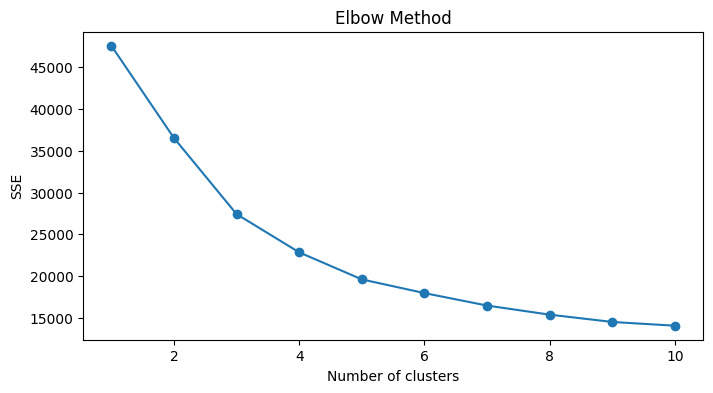

In [13]:
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_tracks)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

In [15]:
# Silhouette Analysis for KMeans
kmeans_silhouette = silhouette_score(scaled_tracks, kmeans_labels)
print(f"KMeans Silhouette Score: {kmeans_silhouette}")

# Silhouette Analysis for DBSCAN
unique_labels = np.unique(dbscan_labels)
n_clusters = len(unique_labels) - (1 if -1 in unique_labels else 0)
if n_clusters >= 2:
    dbscan_labels_filtered = dbscan_labels[dbscan_labels != -1]
    dbscan_silhouette = silhouette_score(scaled_tracks[dbscan_labels != -1], dbscan_labels_filtered)
    print(f"DBSCAN Silhouette Score: {dbscan_silhouette}")
else:
    print("DBSCAN did not produce enough clusters to calculate a silhouette score.")

# Silhouette Analysis for Agglomerative Clustering
agglo_silhouette = silhouette_score(scaled_tracks, agglo_labels)
print(f"Agglomerative Clustering Silhouette Score: {agglo_silhouette}")

KMeans Silhouette Score: 0.3188779828776036
DBSCAN Silhouette Score: 0.035209042642335334
Agglomerative Clustering Silhouette Score: 0.29838811879709465


After checking the Elbow Method graph for KMeans and the Silhouette Score for Agglomerative Clustering, it is apparent that 4 clusters yield the best results for the KMeans and Agglomerative Clustering models.
For the DBSCAN model, its K-Distance graph suggested that setting `eps` to 0.2 and `min_samples` to 14 yielded the best results, with a Silhouette Score of about 0.035.

Therefore, we decided to use the KMeans model for the predictions and user interaction segment due to the nature of the data and its higher Silhouette Score.

<h1>Predictions</h1>

In [16]:
def predict(uids: list, display: tk.Listbox, label: tk.Label):
    favorites = tracks_df[tracks_df['track_id'].isin(uids)]
    
    clusters = favorites['KMeans'].value_counts()
    user_favorite_cluster = clusters.idxmax()

    suggestions = tracks_df[tracks_df['KMeans'] == user_favorite_cluster]
    if len(suggestions) > 5:
        suggestions = suggestions.sample(5)
    
    for index, suggestion in suggestions.iterrows():
        display_text = f"{suggestion['track_name']} by {suggestion['artists'].replace(";", ", ")}"
        display.insert(tk.END, display_text)
        label.pack()
        display.pack(pady=10)

<h1>User Interaction</h1>

In [22]:
# check and update commands from StackOverflow - https://stackoverflow.com/questions/73387066/show-the-possibilities-while-typing-in-entry-field-tkinter

selected_uids = []
uids_dict = {}

def update(entry, listbox, data):
    listbox.delete(0, tk.END)
    height = min(len(data), 5)
    listbox.config(height=height)
    for item in data[:5]:
        display_text = f"{item['track_name']} by {item['artists'].replace(";", ", ")}"
        listbox.insert(tk.END, display_text)
        uids_dict[display_text] = item['track_id']
    if data:
        listbox.place(x=entry.winfo_x(), y=entry.winfo_y() + entry.winfo_height())
        listbox.lift()
    else:
        listbox.place_forget()

def check(entry, listbox):
    v = entry.get()
    if len(v) < 3:
        filtered_data = []
    else:
        filtered_data = tracks_df[tracks_df['track_name'].str.contains(v, case=False, na=False)]
        filtered_data = filtered_data.to_dict('records')
    update(entry, listbox, filtered_data)

def on_select(event, entry, listbox):
    try:
        selected_item = listbox.get(listbox.curselection())
        entry.delete(0, tk.END)
        entry.insert(0, selected_item)
        uid = uids_dict[selected_item]
        selected_uids.append(uid) 
        listbox.place_forget()
    except tk.TclError:
        pass

def add_input_field():
    if len(entry_fields) < 5:  
        new_entry = tk.Entry(root, width=50, font=circular)
        new_entry.pack(pady=5, before=add_button)
        new_listbox = tk.Listbox(root, width=50)
        new_listbox.place_forget()
        new_listbox.bind('<<ListboxSelect>>', lambda event, e=new_entry, l=new_listbox: on_select(event, e, l))
        new_entry.bind("<KeyRelease>", lambda event, e=new_entry, l=new_listbox: check(e, l))
        entry_fields.append(new_entry)
        listboxes.append(new_listbox)
    else:
        add_button.config(state="disabled")

def spotify_link(event):
    selection = event.widget.curselection()
    if selection:
        selected_text = event.widget.get(selection[0])
        track_name, _ = selected_text.rsplit(' by ', 1)
        track_name = track_name.strip()
        spotify_id = tracks_df[tracks_df['track_name'] == track_name]['track_id'].values[0]
        if spotify_id:
            spotify_url = f"https://open.spotify.com/track/{spotify_id}"
            webbrowser.open(spotify_url)


def get_uids():
    all_uids = selected_uids[:]
    return all_uids

def recommend():
    predict(get_uids(), listbox_recs, label)

root = tk.Tk()
root.title("Spotify Recommender Engine")
root.geometry("900x550")

museo = tkFont.Font(family="Museo Sans 700", size=20)
museo_small = tkFont.Font(family="Museo Sans 700", size=16)
circular = tkFont.Font(family="Circular Std", size=12)

name = tk.Label(root, text="Spotify Recommender", font=museo)
name.pack(pady=10)

paragraph = tk.Label(root, text="Welcome to the Spotify Recommender Engine! This Python app uses machine learning to recommend you songs based on your input. Please enter a maximum of 5 songs you like and we will recommend you similar songs.", font=circular, wraplength=450)
paragraph.pack(pady=10)

entry_fields = []
listboxes = []

input = tk.Entry(root, width=50, font=circular)
input.pack()
input.bind("<KeyRelease>", lambda event: check(input, listbox))
entry_fields.append(input)

listbox = tk.Listbox(root, width=50)
listbox.place_forget()
listbox.bind('<<ListboxSelect>>', lambda event: on_select(event, input, listbox))
listboxes.append(listbox)

add_button = tk.Button(root, text="Add more songs", font=circular, command=add_input_field)
add_button.pack(pady=10)

button = tk.Button(root, text="Recommend", font=museo, activebackground="#1DB954", command=recommend)
button.pack(pady=10)

label = tk.Label(root, text="Recommended Songs:", font=museo_small, underline=1)
label.place_forget()

listbox_recs = tk.Listbox(root, width=70, height=5)
listbox_recs.place_forget()
listbox_recs.bind('<<ListboxSelect>>', lambda event: spotify_link(event))

root.mainloop()